In [55]:
# Import library
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
# Load dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

# Konversi ke DataFrame untuk analisis lebih mudah
df = pd.DataFrame(X, columns=feature_names)

In [76]:
# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [61]:
# Menghitung Variance dari setiap fitur (sebelum PCA)
variance = df.var()
print("\n Nilai Variance (Sebelum PCA):")
print(variance)


 Nilai Variance (Sebelum PCA):
alcohol                             0.659062
malic_acid                          1.248015
ash                                 0.075265
alcalinity_of_ash                  11.152686
magnesium                         203.989335
total_phenols                       0.391690
flavanoids                          0.997719
nonflavanoid_phenols                0.015489
proanthocyanins                     0.327595
color_intensity                     5.374449
hue                                 0.052245
od280/od315_of_diluted_wines        0.504086
proline                         99166.717355
dtype: float64


In [63]:
# Menghitung Covariance Matrix dari data yang sudah distandarisasi
covariance_matrix = np.cov(X_scaled.T) 
print("\n Nilai Covariance Matrix:")
print(pd.DataFrame(covariance_matrix, index=feature_names, columns=feature_names))


 Nilai Covariance Matrix:
                               alcohol  malic_acid       ash  \
alcohol                       1.005650    0.094930  0.212740   
malic_acid                    0.094930    1.005650  0.164972   
ash                           0.212740    0.164972  1.005650   
alcalinity_of_ash            -0.311988    0.290130  0.445872   
magnesium                     0.272328   -0.054883  0.288206   
total_phenols                 0.290734   -0.337061  0.129708   
flavanoids                    0.238153   -0.413329  0.115727   
nonflavanoid_phenols         -0.156810    0.294632  0.187283   
proanthocyanins               0.137470   -0.221993  0.009706   
color_intensity               0.549451    0.250392  0.260350   
hue                          -0.072153   -0.564467 -0.075089   
od280/od315_of_diluted_wines  0.072752   -0.370794  0.003933   
proline                       0.647357   -0.193095  0.224890   

                              alcalinity_of_ash  magnesium  total_phenols  \

In [65]:
#  Menghitung Eigenvalues dan Eigenvectors dari Covariance Matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print("\n Eigenvalues (Variansi yang Dijelaskan oleh Setiap PC):")
print(eigenvalues)

print("\n Eigenvectors (Arah dari PC):")
print(pd.DataFrame(eigenvectors, index=feature_names, columns=[f"PC{i+1}" for i in range(len(feature_names))]))


 Eigenvalues (Variansi yang Dijelaskan oleh Setiap PC):
[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.10396199 0.35046627 0.16972374 0.29051203 0.22706428
 0.25232001]

 Eigenvectors (Arah dari PC):
                                   PC1       PC2       PC3       PC4  \
alcohol                      -0.144329  0.483652 -0.207383  0.017856   
malic_acid                    0.245188  0.224931  0.089013 -0.536890   
ash                           0.002051  0.316069  0.626224  0.214176   
alcalinity_of_ash             0.239320 -0.010591  0.612080 -0.060859   
magnesium                    -0.141992  0.299634  0.130757  0.351797   
total_phenols                -0.394661  0.065040  0.146179 -0.198068   
flavanoids                   -0.422934 -0.003360  0.150682 -0.152295   
nonflavanoid_phenols          0.298533  0.028779  0.170368  0.203301   
proanthocyanins              -0.313429  0.039302  0.149454 -0.399057   
color_intensity               0.088617  0.529

In [67]:
# Melakukan PCA dengan 2 komponen utama
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [69]:
# Menampilkan Variance 
explained_variance = pca.explained_variance_ratio_
print("\n Explained Variance Ratio (Setelah PCA):")
print(explained_variance)


 Explained Variance Ratio (Setelah PCA):
[0.36198848 0.1920749 ]


In [71]:
# Menampilkan Principal Components (Bobot kontribusi fitur dalam PCA)
principal_components = pca.components_
print("\n Principal Components (Bobot Setiap Fitur dalam Setiap PC):")
print(pd.DataFrame(principal_components, columns=feature_names, index=["PC1", "PC2"]))


 Principal Components (Bobot Setiap Fitur dalam Setiap PC):
      alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
PC1  0.144329   -0.245188 -0.002051          -0.239320   0.141992   
PC2 -0.483652   -0.224931 -0.316069           0.010591  -0.299634   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
PC1       0.394661    0.422934             -0.298533         0.313429   
PC2      -0.065040    0.003360             -0.028779        -0.039302   

     color_intensity       hue  od280/od315_of_diluted_wines   proline  
PC1        -0.088617  0.296715                      0.376167  0.286752  
PC2        -0.529996  0.279235                      0.164496 -0.364903  


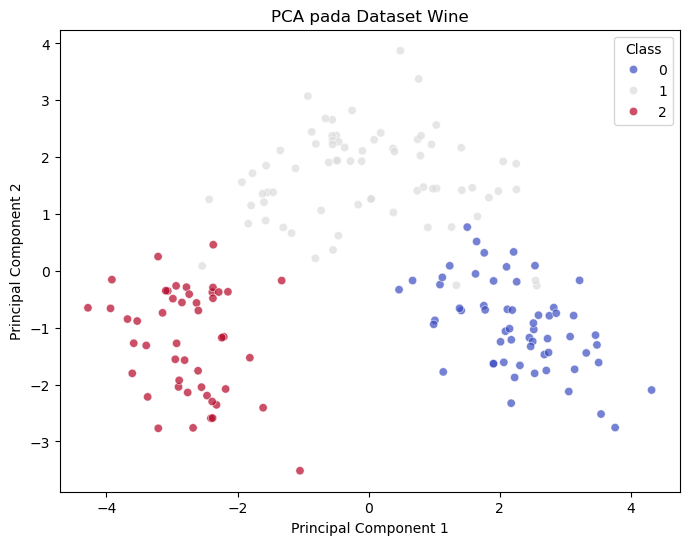

In [73]:
# Visualisasi hasil PCA dalam scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA pada Dataset Wine')
plt.legend(title="Class")
plt.show()